In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, v_measure_score

In [46]:
dia = pd.read_csv('Dia pronostico.csv')[72:216]
dia['K = 1'] = [0]*144
dia['K = 3'] = [0]*144
dia['K = 6'] = [0]*144
dia['K = 12'] = [0]*144
dia

,Fecha,Potencia [kW],Insolacion [W/m2],K = 1,K = 3,K = 6,K = 12
72,6:00,0.00,1.24,0,0,0,0
73,6:05,0.00,2.69,0,0,0,0
74,6:10,0.00,4.68,0,0,0,0
75,6:15,0.04,6.89,0,0,0,0
76,6:20,0.13,10.04,0,0,0,0
...,...,...,...,...,...,...,...
211,17:35,0.74,18.84,0,0,0,0
212,17:40,0.62,16.85,0,0,0,0
213,17:45,0.42,14.27,0,0,0,0
214,17:50,0.20,10.84,0,0,0,0


In [47]:
for i in range(72,216):
    if i == 72: 
        dia['K = 1'][i] = None
    else:
        dia['K = 1'][i] =dia['Potencia [kW]'][i-1]

for i in range(72,216):
    if i <= 74: 
        dia['K = 3'][i] = None
    else:
        dia['K = 3'][i] =dia['Potencia [kW]'][i-3]
        
for i in range(72,216):
    if i <= 77: 
        dia['K = 6'][i] = None
    else:
        dia['K = 6'][i] =dia['Potencia [kW]'][i-6]

for i in range(72,216):
    if i <= 83: 
        dia['K = 12'][i] = None
    else:
        dia['K = 12'][i] =dia['Potencia [kW]'][i-12]

try:
    dia = dia.drop('Insolacion [W/m2]',axis = 1)
except:
    pass
dia = dia[1:]

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __na

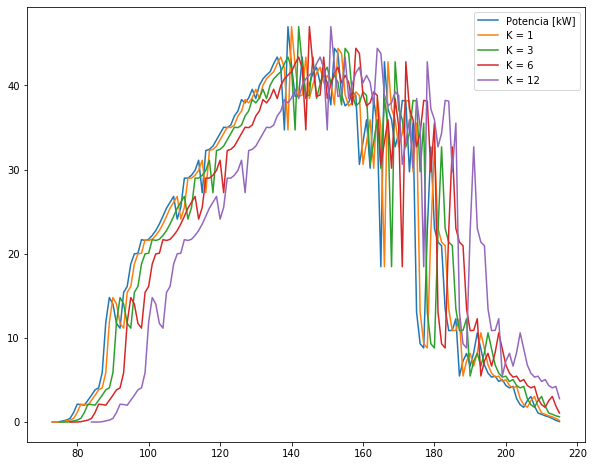

In [48]:
dia.plot(figsize=(10,8))

In [68]:
error1 = np.sqrt(mean_squared_error(dia['Potencia [kW]'],dia['K = 1']))
error3 = np.sqrt(mean_squared_error(dia['Potencia [kW]'][75:],dia['K = 3'][75:]))
error6 = np.sqrt(mean_squared_error(dia['Potencia [kW]'][78:],dia['K = 6'][78:]))
error12 = np.sqrt(mean_squared_error(dia['Potencia [kW]'][84:],dia['K = 12'][84:]))

In [76]:
print('El RMSE de persistencia 1 es:' ,error1, '\n'
      'El RMSE de persistencia 3 es:' ,error3, '\n'
      'El RMSE de persistencia 6 es:' ,error6, '\n'
      'El RMSE de persistencia 12 es:', error12, '\n')

El error de persistencia 1 es: 4.443026121786943 
El error de persistencia 3 es: 7.733823059628857 
El error de persistencia 6 es: 8.776492553318867 
El error de persistencia 12 es: 11.478116393041299 



In [82]:
mae1 = mean_absolute_error(dia['Potencia [kW]'],dia['K = 1'])
mae3 = mean_absolute_error(dia['Potencia [kW]'][75:],dia['K = 3'][75:])
mae6 = mean_absolute_error(dia['Potencia [kW]'][78:],dia['K = 6'][78:])
mae12 = mean_absolute_error(dia['Potencia [kW]'][84:],dia['K = 12'][84:])

In [83]:
print('El RMSE de persistencia 1 es:' ,mae1, '\n'
      'El RMSE de persistencia 3 es:' ,mae3, '\n'
      'El RMSE de persistencia 6 es:' ,mae6, '\n'
      'El RMSE de persistencia 12 es:',mae12, '\n')

El RMSE de persistencia 1 es: 2.3537062937062934 
El RMSE de persistencia 3 es: 4.796617647058824 
El RMSE de persistencia 6 es: 5.989846153846154 
El RMSE de persistencia 12 es: 8.743050847457628 



## Volatilidad

C:\Users\USUARIO\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

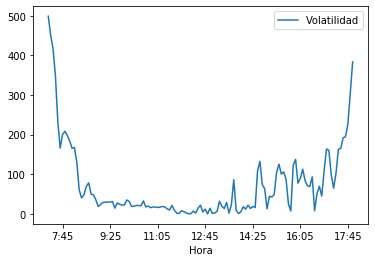

In [148]:
volat = np.absolute(np.log(dia['Potencia [kW]']).diff(12))
volat_df = pd.DataFrame({'Hora':dia['Fecha'],'Volatilidad':volat*100})
volat_df.set_index('Hora',inplace = True)
volat_df.plot()
np.var(volat)*100

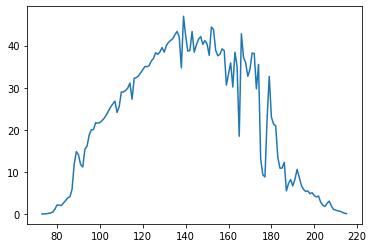

In [150]:
dia['Potencia [kW]'].plot()